## Homework - Week 3


> Note: sometimes your answer doesn't match one of the options exactly. That's fine. 
Select the option that's closest to your solution.

### Dataset

In this homework, we will use the California Housing Prices data from [Kaggle](https://www.kaggle.com/datasets/camnugent/california-housing-prices).

Here's a wget-able [link](https://raw.githubusercontent.com/alexeygrigorev/datasets/master/housing.csv):

```bash
wget https://raw.githubusercontent.com/alexeygrigorev/datasets/master/housing.csv
```
We'll keep working with the `'median_house_value'` variable, and we'll transform it to a classification task. 
 

In [1]:
import pandas as pd
import numpy as np

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

In [15]:
from sklearn.model_selection import train_test_split

In [65]:
df = pd.read_csv('https://raw.githubusercontent.com/alexeygrigorev/datasets/master/housing.csv')

### Features

For the rest of the homework, you'll need to use only these columns:

* `'latitude'`,
* `'longitude'`,
* `'housing_median_age'`,
* `'total_rooms'`,
* `'total_bedrooms'`,
* `'population'`,
* `'households'`,
* `'median_income'`,
* `'median_house_value'`
* `'ocean_proximity'`,

### Data preparation

* Select only the features from above and fill in the missing values with 0.
* Create a new column `rooms_per_household` by dividing the column `total_rooms` by the column `households` from dataframe. 
* Create a new column `bedrooms_per_room` by dividing the column `total_bedrooms` by the column `total_rooms` from dataframe. 
* Create a new column `population_per_household` by dividing the column `population` by the column `households` from dataframe. 

In [66]:
df.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

In [67]:
# Missing values
df.isnull().sum().sort_values(ascending=False)

total_bedrooms        207
longitude               0
latitude                0
housing_median_age      0
total_rooms             0
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [68]:
# Fill missing values with 0
df['total_bedrooms'] = df['total_bedrooms'].fillna(0)

In [69]:
# Create a new column rooms_per_household by dividing the column total_rooms by the column households from dataframe.
df['rooms_per_household'] = df['total_rooms']/df['households']

In [70]:
# Create a new column bedrooms_per_room by dividing the column total_bedrooms by the column total_rooms from dataframe.
df['bedrooms_per_room'] = df['total_bedrooms']/df['total_rooms']

In [71]:
# Create a new column population_per_household by dividing the column population by the column households from dataframe.
df['population_per_household'] = df['population']/df['households']

### Question 1

What is the most frequent observation (mode) for the column `ocean_proximity`?

Options:
* `NEAR BAY`
* **`<1H OCEAN`**
* `INLAND`
* `NEAR OCEAN`

In [72]:
# Most frequent observation (mode) for the column ocean_proximity
df['ocean_proximity'].mode()

0    <1H OCEAN
dtype: object

### Make `median_house_value` binary

* We need to turn the `median_house_value` variable from numeric into binary.
* Let's create a variable `above_average` which is `1` if the `median_house_value` is above its mean value and `0` otherwise.

In [73]:
df['above_average'] = np.where(df['median_house_value'] > df['median_house_value'].mean(), 1, 0) 

## Split the data

* Split your data in train/val/test sets, with 60%/20%/20% distribution.
* Use Scikit-Learn for that (the `train_test_split` function) and set the seed to 42.
* Make sure that the target value (`median_house_value`) is not in your dataframe.

In [74]:
# Split your data in train/val/test sets, with 60%/20%/20% distribution.
df_train_full, df_test = train_test_split(df, test_size=0.2, random_state=42)

df_train,df_val = train_test_split(df_train_full, test_size=0.25, random_state=42)

In [75]:
y_train = df_train["above_average"].values
y_val = df_val["above_average"].values
y_test = df_test["above_average"].values

In [76]:
del df_train["above_average"]
del df_val["above_average"]
del df_test["above_average"]

### Question 2

* Create the [correlation matrix](https://www.google.com/search?q=correlation+matrix) for the numerical features of your train dataset.
    - In a correlation matrix, you compute the correlation coefficient between every pair of features in the dataset.
* What are the two features that have the biggest correlation in this dataset?

Options:
* **`total_bedrooms` and `households`**
* `total_bedrooms` and `total_rooms`
* `population` and `households`
* `population_per_household` and `total_rooms`

<AxesSubplot:>

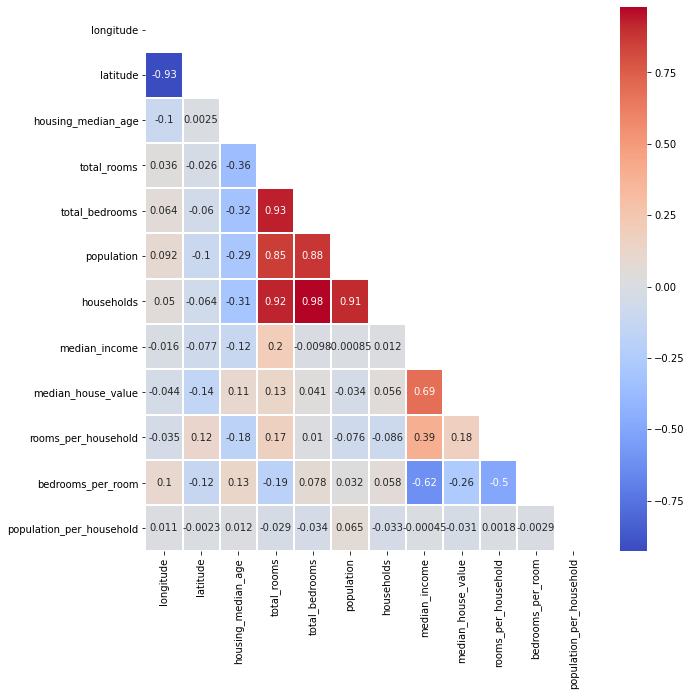

In [77]:
# Correlation matrix
# total_bedrooms and households have the biggest corelation 0.98
corr_matrix = df_train.corr()
mask = np.triu(corr_matrix)
plt.figure(figsize=(10,10))  
sns.heatmap(corr_matrix, cmap='coolwarm', annot=True, linewidths=2, mask=mask)

### Question 3

* Calculate the mutual information score with the (binarized) price for the categorical variable that we have. Use the training set only.
* What is the value of mutual information?
* Round it to 2 decimal digits using `round(score, 2)`

Options:
- 0.263
- 0.00001
- **0.101**
- 0.15555

In [78]:
df.dtypes

longitude                   float64
latitude                    float64
housing_median_age          float64
total_rooms                 float64
total_bedrooms              float64
population                  float64
households                  float64
median_income               float64
median_house_value          float64
ocean_proximity              object
rooms_per_household         float64
bedrooms_per_room           float64
population_per_household    float64
above_average                 int64
dtype: object

In [80]:
df.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity', 'rooms_per_household',
       'bedrooms_per_room', 'population_per_household', 'above_average'],
      dtype='object')

In [81]:
df.dtypes

longitude                   float64
latitude                    float64
housing_median_age          float64
total_rooms                 float64
total_bedrooms              float64
population                  float64
households                  float64
median_income               float64
median_house_value          float64
ocean_proximity              object
rooms_per_household         float64
bedrooms_per_room           float64
population_per_household    float64
above_average                 int64
dtype: object

In [131]:
# Categorical variables
categorical = ['ocean_proximity']
numerical = ['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'rooms_per_household','bedrooms_per_room', 'population_per_household', ]

In [84]:
# Mutual information score
from sklearn.metrics import mutual_info_score

score = mutual_info_score(df_train_full['ocean_proximity'], df_train_full['above_average'])

print("Mutual Information score:",round(score, 3))


Mutual Information score: 0.102


### Question 4

* Now let's train a logistic regression
* Remember that we have one categorical variable `ocean_proximity` in the data. Include it using one-hot encoding.
* Fit the model on the training dataset.
    - To make sure the results are reproducible across different versions of Scikit-Learn, fit the model with these parameters:
    - `model = LogisticRegression(solver="liblinear", C=1.0, max_iter=1000, random_state=42)`
* Calculate the accuracy on the validation dataset and round it to 2 decimal digits.

Options:
- 0.60
- 0.72
- **0.84**
- 0.95

In [85]:
from sklearn.feature_extraction import DictVectorizer

In [89]:
train_dicts = df_train[categorical+numerical].to_dict(orient="records")

In [90]:
dict_vect = DictVectorizer(sparse=False)
X_train = dict_vect.fit_transform(train_dicts)

In [91]:
dict_vect.feature_names_

['bedrooms_per_room',
 'households',
 'housing_median_age',
 'latitude',
 'longitude',
 'median_income',
 'ocean_proximity=<1H OCEAN',
 'ocean_proximity=INLAND',
 'ocean_proximity=ISLAND',
 'ocean_proximity=NEAR BAY',
 'ocean_proximity=NEAR OCEAN',
 'population',
 'population_per_household',
 'rooms_per_household',
 'total_bedrooms',
 'total_rooms']

In [92]:
from sklearn.linear_model import LogisticRegression

In [93]:
model = LogisticRegression(solver="liblinear", C=1.0, max_iter=1000, random_state=42)

In [94]:
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000, random_state=42, solver='liblinear')

In [95]:
val_dicts = df_val[categorical+numerical].to_dict(orient="records")
X_val = dict_vect.transform(val_dicts)

In [99]:
y_pred_val = model.predict(X_val)

In [102]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_val, y_pred_val)
print("Accuracy on validation set:", round(accuracy, 2))

Accuracy on validation set: 0.84


### Question 5 

* Let's find the least useful feature using the *feature elimination* technique.
* Train a model with all these features (using the same parameters as in Q4).
* Now exclude each feature from this set and train a model without it. Record the accuracy for each model.
* For each feature, calculate the difference between the original accuracy and the accuracy without the feature. 
* Which of following feature has the smallest difference? 
   * **`total_rooms`**
   * `total_bedrooms` 
   * `population`
   * `households`

> **note**: the difference doesn't have to be positive

In [136]:
import warnings
warnings.filterwarnings("ignore")

In [132]:
features = numerical + categorical

In [133]:
features

['longitude',
 'latitude',
 'housing_median_age',
 'total_rooms',
 'total_bedrooms',
 'population',
 'households',
 'median_income',
 'rooms_per_household',
 'bedrooms_per_room',
 'population_per_household',
 'ocean_proximity']

In [139]:
for col in features:
    subset = features.copy()
    subset.remove(col)
    
    train_dicts = df_train[subset].to_dict(orient='records')

    dict_vect = DictVectorizer(sparse=False)
    

    X_train = dict_vect.fit_transform(train_dicts)

    model = LogisticRegression(solver='lbfgs', C=1.0, max_iter=1000, random_state=42)
    model.fit(X_train, y_train)

    val_dicts = df_val[subset].to_dict(orient='records')
    X_val = dict_vect.transform(val_dicts)

    y_pred_val = model.predict(X_val)

    new_accuracy = accuracy_score(y_val, y_pred_val)
    print(f"{col}: \t{round(accuracy - new_accuracy, 4)} \t {round(new_accuracy, 4)}")
    

longitude: 	0.0058 	 0.8304
latitude: 	0.0034 	 0.8328
housing_median_age: 	0.0063 	 0.8299
total_rooms: 	-0.0005 	 0.8367
total_bedrooms: 	0.0012 	 0.835
population: 	0.0085 	 0.8278
households: 	0.0019 	 0.8343
median_income: 	0.0509 	 0.7854
rooms_per_household: 	0.001 	 0.8353
bedrooms_per_room: 	-0.0002 	 0.8365
population_per_household: 	0.0005 	 0.8358
ocean_proximity: 	0.0162 	 0.82


### Question 6

* For this question, we'll see how to use a linear regression model from Scikit-Learn
* We'll need to use the original column `'median_house_value'`. Apply the logarithmic transformation to this column.
* Fit the Ridge regression model (`model = Ridge(alpha=a, solver="sag", random_state=42)`) on the training data.
* This model has a parameter `alpha`. Let's try the following values: `[0, 0.01, 0.1, 1, 10]`
* Which of these alphas leads to the best RMSE on the validation set? Round your RMSE scores to 3 decimal digits.

If there are multiple options, select the smallest `alpha`.

Options:
- **0**
- 0.01
- 0.1
- 1
- 10

<AxesSubplot:>

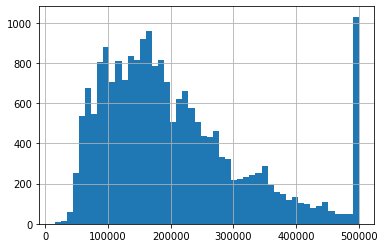

In [140]:
df['median_house_value'].hist(bins=50)

In [141]:
# Apply log transformation
df['median_house_value'] = np.log1p(df['median_house_value'])

In [143]:
# Repeat the df splitting
df_train_full, df_test = train_test_split(df, test_size=0.2, random_state=42)
df_train, df_val = train_test_split(df_train_full, test_size=0.25, random_state=42)

df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

y_train = df_train['median_house_value'].values
y_val = df_val['median_house_value'].values
y_test = df_test['median_house_value'].values

del df_train['median_house_value']
del df_val['median_house_value']
del df_test['median_house_value']

In [144]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error

In [151]:
features

['longitude',
 'latitude',
 'housing_median_age',
 'total_rooms',
 'total_bedrooms',
 'population',
 'households',
 'median_income',
 'rooms_per_household',
 'bedrooms_per_room',
 'population_per_household',
 'ocean_proximity']

In [145]:
train_dicts = df_train[categorical+numerical].to_dict(orient="records")
dict_vect = DictVectorizer(sparse=False)
    
X_train = dict_vect.fit_transform(train_dicts)


In [152]:
dict_vect.feature_names_

['bedrooms_per_room',
 'households',
 'housing_median_age',
 'latitude',
 'longitude',
 'median_income',
 'ocean_proximity=<1H OCEAN',
 'ocean_proximity=INLAND',
 'ocean_proximity=ISLAND',
 'ocean_proximity=NEAR BAY',
 'ocean_proximity=NEAR OCEAN',
 'population',
 'population_per_household',
 'rooms_per_household',
 'total_bedrooms',
 'total_rooms']

In [147]:
val_dicts = df_val[categorical+numerical].to_dict(orient="records")

    
X_val = dict_vect.transform(val_dicts)

In [154]:
for a in [0, 0.01, 0.1, 1, 10]:
    model = Ridge(alpha=a, solver="sag", random_state=42)
    model.fit(X_train, y_train)
    y_pred_val = model.predict(X_val)
    rmse = np.sqrt(mean_squared_error(y_val, y_pred_val))
    print(f"Alpha {a}: {round(rmse, 3)}")

Alpha 0: 0.524
Alpha 0.01: 0.524
Alpha 0.1: 0.524
Alpha 1: 0.524
Alpha 10: 0.524


## Submit the results

* Submit your results here: https://forms.gle/vQXAnQDeqA81HSu86
* You can submit your solution multiple times. In this case, only the last submission will be used 
* If your answer doesn't match options exactly, select the closest one

## Deadline

The deadline for submitting is 26 September (Monday), 23:00 CEST.

After that, the form will be closed.